<a href="https://colab.research.google.com/github/arkaprabha10/Social-Network-Analysis/blob/main/trial%20epinion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import community
import community.community_louvain as community_louvain
import networkx as nx
import random
import collections

In [ ]:
# Run this cell only on colab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
# for csv file
# Run this cell only on colab
link='https://drive.google.com/file/d/1KJ8Lb7RrvnRJGQOEKEjbdG8fq1UbBmWk/view?usp=sharing'
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('data.txt')

In [8]:
graph = nx.DiGraph()
epi_csv = pd.read_csv('wiki.txt', delimiter="\t")
#epi_csv = pd.read_csv('data.txt', delimiter="\t")
print(epi_csv.shape)
print(epi_csv.head(5))
epi_csv.columns = ['From','To']
# We check if the file has loaded
epi_csv.head()
tempWeight = [1 for i in range(103689)]
epi_csv['Weight'] = tempWeight

# Adding the edges.
for index,row in epi_csv.iterrows():
    graph.add_edges_from([(row[0],row[1])],weight = row[2])

(103689, 2)
   Source  Destination
0      30         1412
1      30         3352
2      30         5254
3      30         5543
4      30         7478


In [7]:
epi_csv

,From,To,Weight
0,30,1412,1
1,30,3352,1
2,30,5254,1
3,30,5543,1
4,30,7478,1
...,...,...,...
103684,8272,4940,1
103685,8273,4940,1
103686,8150,8275,1
103687,8150,8276,1


In [9]:
# Number of nodes
print(graph.number_of_nodes())

# Number of edges
print(graph.number_of_edges())

# Positive and negative edges 

Stats = pd.DataFrame(graph.out_degree(),columns=['From','Outdegree']).sort_values('From')
Stats_2 =  pd.DataFrame(graph.in_degree(),columns=['To','Indegree']).sort_values('To')
b= epi_csv.groupby('From',as_index=False)[['Weight']].sum().sort_values('From')
c= epi_csv.groupby('To',as_index=False)[['Weight']].sum().sort_values('To')
Stats = Stats.merge(b,on='From',how='left')
Stats_2 = Stats_2.merge(c,on='To',how='left')
Stats['Pos_out'] = (  Stats['Outdegree'] + Stats['Weight']  )/2
Stats['Neg_out'] = (  Stats['Outdegree'] - Stats['Weight']  )/2
Stats_2['Pos_in']= (Stats_2['Indegree']  + Stats_2['Weight'])/2
Stats_2['Neg_in']= (Stats_2['Indegree']  - Stats_2['Weight'])/2
Stats = pd.merge(Stats,Stats_2,left_on='From', right_on='To').drop('To', axis=1)
Stats = Stats.drop(['Weight_x','Weight_y'],axis=1)
Stats.fillna(0,inplace=True)
Stats.head()

7115
103689


,From,Outdegree,Pos_out,Neg_out,Indegree,Pos_in,Neg_in
0,3,23,23.0,0.0,31,31.0,0.0
1,4,29,29.0,0.0,0,0.0,0.0
2,5,23,23.0,0.0,0,0.0,0.0
3,6,302,302.0,0.0,20,20.0,0.0
4,7,24,24.0,0.0,0,0.0,0.0


In [10]:
Stats.describe()
print(Stats.max(axis=0))

From         8297.0
Outdegree     893.0
Pos_out       893.0
Neg_out         0.0
Indegree      457.0
Pos_in        457.0
Neg_in          0.0
dtype: float64


In [11]:
print(graph.number_of_edges())
print(graph.number_of_nodes())
print(nx.average_clustering(graph))
print(nx.transitivity(graph))
print(nx.density(graph))

103689
7115
0.08156344522820935
0.05285122817867548
0.0020485375110809584


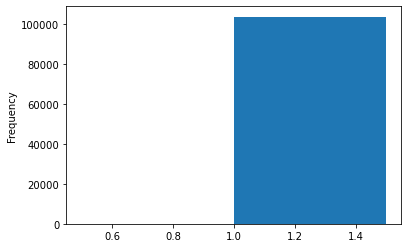

In [12]:
epi_csv['Weight'].plot.hist(bins=2, alpha=1)
plt.xlabel('')
plt.show()

Counter({0: 4734, 1: 78, 5: 54, 3: 51, 2: 45, 13: 44, 12: 44, 11: 44, 10: 44, 7: 44, 6: 42, 4: 40, 8: 39, 22: 38, 9: 38, 18: 36, 17: 35, 14: 35, 15: 34, 34: 33, 47: 31, 48: 30, 38: 30, 29: 30, 24: 30, 57: 29, 46: 29, 43: 29, 21: 29, 54: 28, 39: 28, 33: 28, 28: 28, 30: 27, 20: 27, 53: 26, 51: 26, 31: 26, 26: 26, 50: 24, 49: 24, 16: 24, 60: 23, 42: 23, 40: 23, 64: 22, 37: 22, 35: 22, 25: 22, 63: 21, 61: 21, 58: 21, 45: 21, 27: 21, 44: 20, 41: 20, 74: 19, 65: 19, 55: 19, 52: 19, 32: 19, 23: 19, 19: 19, 59: 18, 56: 17, 71: 15, 82: 14, 81: 14, 77: 14, 69: 14, 67: 14, 72: 13, 73: 12, 66: 12, 62: 12, 90: 11, 88: 11, 79: 11, 101: 10, 78: 10, 36: 10, 75: 9, 97: 8, 93: 8, 85: 8, 83: 8, 70: 8, 68: 8, 105: 7, 104: 7, 89: 7, 80: 7, 117: 6, 100: 6, 95: 6, 94: 6, 87: 6, 76: 6, 110: 5, 107: 5, 99: 5, 84: 5, 162: 4, 149: 4, 115: 4, 92: 4, 181: 3, 145: 3, 136: 3, 135: 3, 128: 3, 122: 3, 118: 3, 116: 3, 113: 3, 109: 3, 108: 3, 86: 3, 195: 2, 193: 2, 192: 2, 186: 2, 175: 2, 165: 2, 164: 2, 158: 2, 153: 2,

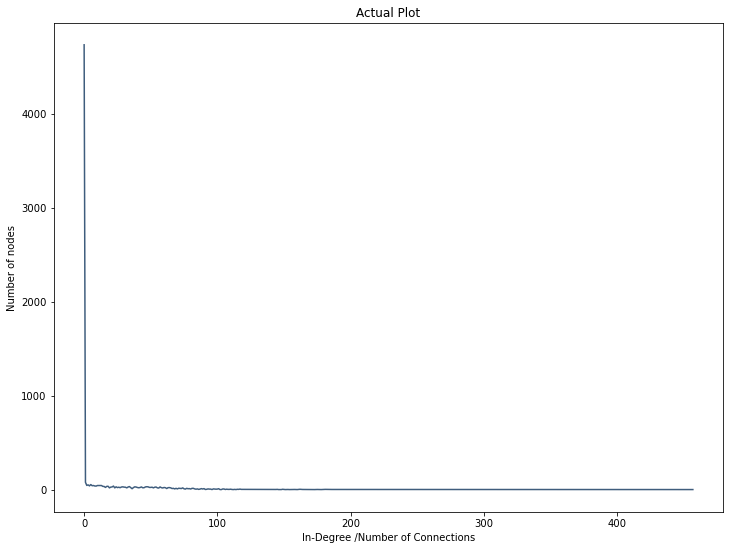

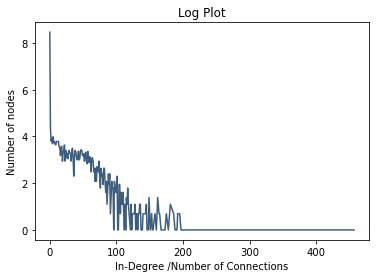

In [13]:
# Degree distribtion for In-degree
degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(deg,cnt,color="#3F5D7D")
plt.xlabel('In-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Actual Plot')
plt.show()
print()
plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
plt.xlabel('In-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Log Plot')
plt.show()


Counter({1: 2382, 0: 1005, 2: 704, 3: 401, 4: 279, 5: 162, 6: 159, 7: 131, 8: 110, 9: 91, 10: 79, 11: 75, 12: 68, 13: 61, 15: 57, 14: 56, 16: 48, 18: 44, 19: 40, 20: 32, 17: 32, 21: 31, 22: 30, 24: 29, 29: 28, 31: 25, 28: 25, 41: 24, 26: 24, 44: 23, 39: 23, 30: 23, 23: 23, 33: 22, 27: 20, 25: 19, 35: 18, 50: 17, 45: 16, 36: 16, 32: 16, 37: 15, 34: 15, 42: 14, 47: 13, 46: 13, 68: 12, 52: 12, 48: 12, 38: 12, 79: 11, 49: 11, 81: 10, 43: 10, 40: 10, 80: 9, 77: 9, 66: 9, 61: 9, 95: 8, 89: 8, 75: 8, 65: 8, 62: 8, 57: 8, 55: 8, 54: 8, 53: 8, 93: 7, 70: 7, 64: 7, 63: 7, 76: 6, 69: 6, 60: 6, 51: 6, 156: 5, 139: 5, 123: 5, 122: 5, 121: 5, 101: 5, 100: 5, 91: 5, 88: 5, 86: 5, 72: 5, 59: 5, 58: 5, 56: 5, 146: 4, 142: 4, 114: 4, 113: 4, 105: 4, 103: 4, 99: 4, 98: 4, 90: 4, 74: 4, 71: 4, 164: 3, 145: 3, 144: 3, 135: 3, 124: 3, 117: 3, 115: 3, 112: 3, 108: 3, 104: 3, 102: 3, 94: 3, 87: 3, 85: 3, 84: 3, 82: 3, 73: 3, 67: 3, 271: 2, 244: 2, 241: 2, 238: 2, 232: 2, 230: 2, 227: 2, 214: 2, 199: 2, 191: 2

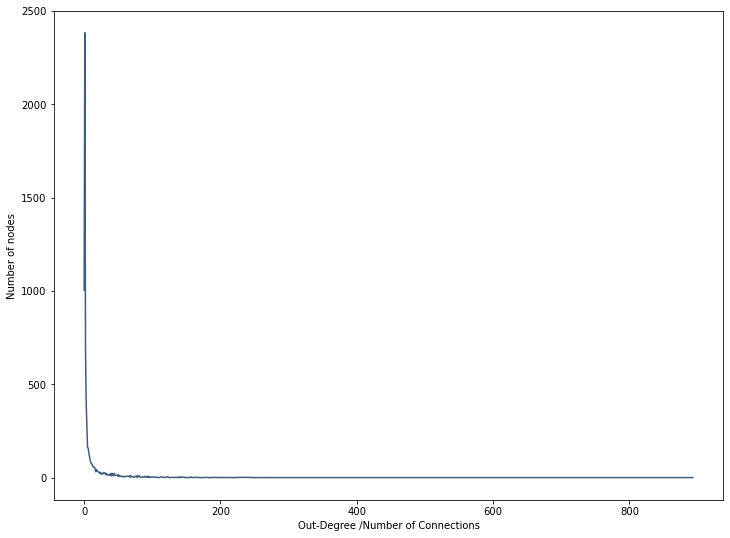

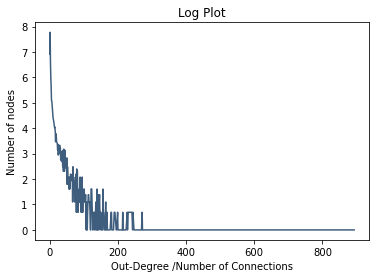

In [14]:
# Degree distribtion for out-degree
degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(deg,cnt,color="#3F5D7D")
plt.xlabel('Out-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.show()

print()
plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
plt.xlabel('Out-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Log Plot')
plt.show()


In [15]:
# Degree centrality stats
print("In-degree")
in_degree_centrality_nodes = nx.in_degree_centrality(graph)
in_degree_centrality_nodes = collections.Counter(in_degree_centrality_nodes)
for k, v in in_degree_centrality_nodes.most_common(10):
  print ((k, v))
print("\n Out-degree \n")
out_degree_centrality_nodes = nx.out_degree_centrality(graph)
out_degree_centrality_nodes = collections.Counter(out_degree_centrality_nodes)
for k, v in out_degree_centrality_nodes.most_common(10):
  print ((k, v))

# degree_centrality_nodes = nx.degree_centrality(graph)
# degree_centrality_nodes = collections.Counter(degree_centrality_nodes)
# for k, v in degree_centrality_nodes.most_common(100):
#   print (k,v)


In-degree
(4037, 0.06423952769187517)
(15, 0.0507450098397526)
(2398, 0.04779308405960079)
(2625, 0.04652797301096429)
(1297, 0.04343547933651954)
(2565, 0.03851560303626651)
(762, 0.03823446724768063)
(2328, 0.03739105988192297)
(5254, 0.03725049198763002)
(3352, 0.037109924093337084)

 Out-degree 

(2565, 0.12552712960359855)
(766, 0.10865898228844531)
(11, 0.10444194545965702)
(457, 0.10289569862243464)
(2688, 0.08687095867303908)
(1166, 0.08420016868147315)
(1549, 0.08251335394995783)
(1151, 0.06634804610626932)
(1374, 0.0649423671633399)
(1133, 0.056086589822884454)


In [16]:
# Eigen Vector centrality stats
print("Eigen Vector centrality")
eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
for k, v in eigenvector_centrality_nodes.most_common(10):
  print ((k, v))


Eigen Vector centrality
(2398, 0.11719694619047778)
(4037, 0.10896914427330906)
(15, 0.09818046327225054)
(4191, 0.0956856533781376)
(2625, 0.09549308500963673)
(1549, 0.09502096303167477)
(2328, 0.0948106621470455)
(3089, 0.09311134675778966)
(5412, 0.09050188238864595)
(2066, 0.090451907832514)


In [13]:
# Katz centrality stats
# Not running on colab
print("Katz centrality")
katz_centrality_numpy_nodes = nx.katz_centrality_numpy(graph)
katz_centrality_numpy_nodes = collections.Counter(katz_centrality_numpy_nodes)
for k, v in katz_centrality_numpy_nodes.most_common(10):
  print ((k, v))


Katz centrality


MemoryError: Unable to allocate 64.7 GiB for an array with shape (131828, 131828) and data type int32

In [12]:
# Closeness centrality stats
# Not running on colab
print("closeness centrality ")
closeness_centrality_nodes = nx.closeness_centrality(graph)
closeness_centrality_nodes = collections.Counter(closeness_centrality_nodes)
for k, v in closeness_centrality_nodes.most_common(10):
  print ((k, v))


closeness centrality 


KeyboardInterrupt: 

In [ ]:
# Betweenness centrality stats
# Not running on colab
print("Betweenness centrality ")
betweenness_centrality_nodes = nx.betweenness_centrality(graph)
betweenness_centrality_nodes = collections.Counter(betweenness_centrality_nodes)
for k, v in betweenness_centrality_nodes.most_common(10):
  print ((k, v))

Betweenness centrality 


<ipython-input-17-41eb34afa9f5>:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


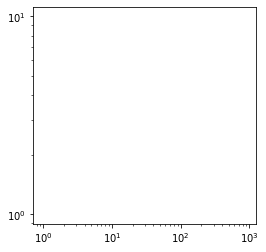

In [17]:
# Out degree and indegree relationship, relationship between positive and negative weighted outgoing 
# edges in the network and relationship between positive and negative ingoing edges.

plt.figure(figsize=(4,4))
plt.plot(Stats['Pos_out'],Stats['Neg_out'],'ro',markersize=0.25)
plt.xscale('log')
plt.yscale('log')

<ipython-input-18-7c72c3d683bc>:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


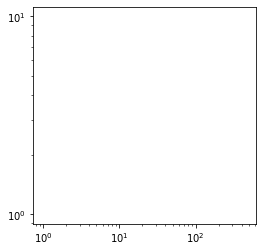

In [18]:
plt.figure(figsize=(4,4))
plt.plot(Stats['Pos_in'],Stats['Neg_in'],'ro',markersize=0.25)
plt.xscale('log')
plt.yscale('log')

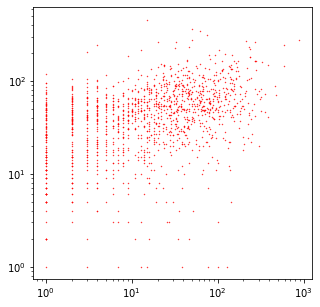

In [19]:
plt.figure(figsize=(5,5))
plt.plot(Stats['Outdegree'],Stats['Indegree'],'ro',markersize=0.4)
plt.xscale('log')
plt.yscale('log')

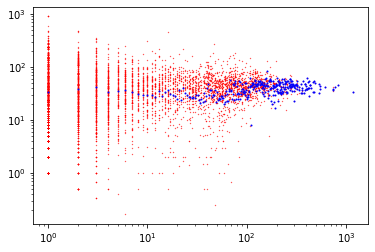

In [20]:
Deg_cor = nx.average_neighbor_degree(graph,target='out')
dict_list = []
for key, value in Deg_cor.items():
    temp = [key,value]
    temp[0] = graph.degree(key,'out')
    dict_list.append(temp)
dfa1 = pd.DataFrame(dict_list,columns =['Outdegree','Average neighbors outdegree'])
dfa2 = dfa1.groupby('Outdegree',as_index=False)['Average neighbors outdegree'].mean()
plt.plot(dfa1['Outdegree'],dfa1['Average neighbors outdegree'],'ro',markersize=0.3)
plt.plot(dfa2['Outdegree'],dfa2['Average neighbors outdegree'],'bo',markersize=1)
plt.xscale('log')
plt.yscale('log')

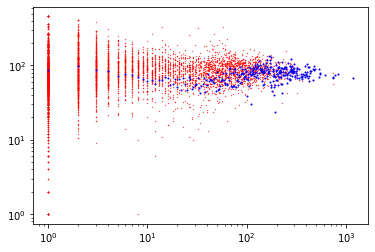

In [21]:
Deg_cor = nx.average_neighbor_degree(graph,target='in')
dict_list = []
for key, value in Deg_cor.items():
    temp = [key,value]
    temp[0] = graph.degree(key,'in')
    dict_list.append(temp)
dfa1 = pd.DataFrame(dict_list,columns =['Indegree','Average neighbors indegree'])
dfa2 = dfa1.groupby('Indegree',as_index=False)['Average neighbors indegree'].mean()
plt.plot(dfa1['Indegree'],dfa1['Average neighbors indegree'],'ro',markersize=0.3)
plt.plot(dfa2['Indegree'],dfa2['Average neighbors indegree'],'bo',markersize=1)

plt.xscale('log')
plt.yscale('log')

In [22]:
print(nx.degree_assortativity_coefficient(graph,'in','in'))
print(nx.degree_assortativity_coefficient(graph,'out','out'))

0.025339639151315253
-0.017617003438893494


In [23]:
nx.degree_assortativity_coefficient(graph)

-0.0710725838860785

In [ ]:
# Let top 200 out of 300 people adopt a certain opinion
import random
random.seed(5)
op1 = Stats[['From','Pos_in']].sort_values(by=['Pos_in'], ascending=False)[0:300]
op2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[0:100]
adopters =  random.sample(list(op1['From']), k=200) + random.sample(list(op2['From']), k=50)
Stats['Adopt']   = 0
Stats['Heard']   = 0
Stats['Adopted'] = 0
for node in adopters :
    Stats.loc[node-1,'Adopt'] = 1

Total_adopters = 250
c = []
change = True
threshold = 0.4
j=0 
while change:
    new_adopters = 0
    for node in graph.nodes:
        if Stats.loc[node-1,'Heard'] == 0:
            Stats.at[node-1,'Heard'] = j
        if Stats.loc[node-1,'Adopt'] == 0 and graph.out_degree(node)!= 0:
            trust_ch = 0
            no_out = graph.out_degree(node) 
            for outgoing in graph.successors(node):
                if Stats.loc[outgoing-1,'Adopt'] == 1:
                    trust_ch += graph.get_edge_data(node,outgoing).get('weight')
            if trust_ch / no_out > threshold:
                Stats.at[node-1,'Adopt'] = 1
                Stats.at[node-1,'Adopted'] = j
                new_adopters += 1
    c.append(new_adopters)  
    j+=1 
    print('The number of new adopters at step ' + str(j) + ' is ' + str(new_adopters))
    if new_adopters == 0:
        change = False

KeyError: -1

In [24]:
import random
random.seed(5)
op1 = Stats[['From','Pos_in']].sort_values(by=['Pos_in'], ascending=False)[0:300]
op2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[0:100]
adopters =  random.sample(list(op1['From']), k=200) + random.sample(list(op2['From']), k=50)
Stats['Adopt']   = 0
Stats['Heard']   = 0
Stats['Adopted'] = 0
for node in adopters :
    Stats.loc[node-1,'Adopt'] = 1

In [25]:
import math
pos = Stats['Indegree'][Stats['Indegree'] != 0]
pos = pos.transform(lambda x: math.floor(math.log(x)) )

prob = pos.value_counts(normalize=True)
threshold = 0.0001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',log=True,color='r')

TypeError: cannot convert the series to <class 'float'>

In [26]:
import math
import igraph
pos = Stats['Indegree'][Stats['Indegree'] != 0]
igraph.power_law_fit(pos)

FittedPowerLaw(continuous=True, alpha=nan, xmin=112.0, L=nan, D=0.0, p=1.0)

In [27]:
nx.degree_assortativity_coefficient(graph,'in')

0.025339639151315253

In [28]:
nx.degree_assortativity_coefficient(graph,'out')


-0.0710725838860785

In [29]:
nx.degree_assortativity_coefficient(graph)


-0.0710725838860785

In [30]:
SCC = max(nx.strongly_connected_components(graph), key=len)
print('Size of maximal strongly connected component is ' + str(len(SCC)))
WCC = max(nx.weakly_connected_components(graph), key=len)
print('Size of maximal weakly connected component is ' + str(len(WCC)))
DIF = list(set(WCC)-set(SCC))
OUT_C = []
IN_C = []
IN = 0
OUT = 0
for index, node1 in enumerate(DIF):
    for index2, node2 in enumerate(SCC):
        
        if graph.has_edge(node1,node2):
            OUT+=1
            OUT_C.append(node2)
            break
        elif graph.has_edge(node2,node1):
            IN+=1
            IN_C.append(node1)
            break

    
TND = len(DIF)-IN-OUT
print(IN,OUT,TND)

Size of maximal strongly connected component is 1300
Size of maximal weakly connected component is 7066
1014 3855 897


In [31]:
SCC = max(nx.strongly_connected_components(graph), key=len)
scc_com = graph.subgraph(SCC).copy()
scc2 = nx.Graph(scc_com)

# Removing the weights.

for u,v,d in scc2.edges(data=True):
    d['weight']=1

communities =community_louvain.best_partition(scc2,random_state=5)

In [32]:
print(set(communities.values()))

{0, 1, 2}


In [33]:
ind_graph = community_louvain.induced_graph(communities, scc2)

inv_map = dict()
for key, value in communities.items():
    inv_map.setdefault(value, list()).append(key)
    
# Removing the small communities

inv_map2 = {key:val for key, val in inv_map.items() if len(val) >= 100}
sizes = np.array([len(inv_map2[k]) for k in list(inv_map2.keys())])

# Removing edges from the graph:

inv_keys = [key for key in inv_map2]
ind_nodes = list(ind_graph.nodes())
for node in ind_nodes:
    if node not in inv_keys:
        ind_graph.remove_node(node)

In [34]:
community_louvain.modularity(communities,scc2)

0.380823470025459

In [35]:
print(sizes)

[477 496 327]


In [36]:
import math
pos = Stats['Outdegree'][Stats['Outdegree'] != 0]
pos = pos.transform(lambda x: math.floor(math.log(x)) )

prob = pos.value_counts(normalize=True)
threshold = 0.0001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',log=True,color='r')

TypeError: cannot convert the series to <class 'float'>

In [37]:
import math
import igraph
pos = Stats['Outdegree'][Stats['Outdegree'] != 0]
igraph.power_law_fit(pos)

FittedPowerLaw(continuous=True, alpha=nan, xmin=83.0, L=nan, D=0.0033112582781456954, p=1.0)

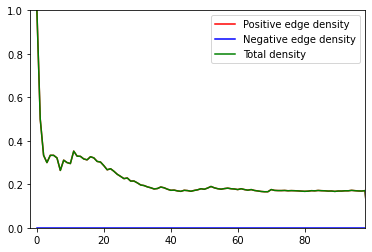

0.2835203780271707

In [38]:
# We want to see the rich club effect in the 100 edges with the highest indegree.
picked = 100
rce1 = Stats[['From','Indegree']].sort_values(by=['Indegree'], ascending=False)[0:picked]
rich = list(rce1.From.values)
rece_graph = graph.subgraph(rich).copy()
# Dropping first value

densities = np.zeros((3,picked))
pos_edges = 0
neg_edges = 0 
for rank, node1 in enumerate(rich[1::]):
    
    for rank2, node2 in enumerate(rich[:rank+1]): 
        if graph.has_edge(node1, node2):
            if graph[node1][node2]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
        if graph.has_edge(node2, node1):
            if graph[node2][node1]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
            
    densities[0][rank] = pos_edges/(rank+2)/(rank+1)
    densities[1][rank] = neg_edges/(rank+2)/(rank+1)
    densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)
    

plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
plt.legend(loc="upper right")
plt.ylim((0,1))
plt.xlim((-2,picked-2))
plt.show()


# Checking the one sidedness
nx.reciprocity(rece_graph)

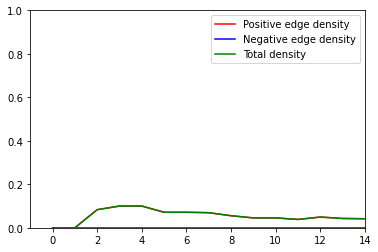

In [39]:
# We want to see the rich club effect in the 100 edges with the highest negative_degree.
picked = 16
rce2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[4:picked+4]
rich = list(rce2.From.values)
# Dropping first value

densities = np.zeros((3,picked))
pos_edges = 0
neg_edges = 0 

for rank, node1 in enumerate(rich[1::]):
    
    for rank2, node2 in enumerate(rich[:rank+1]): 
        if graph.has_edge(node1, node2):
            if graph[node1][node2]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
        if graph.has_edge(node2, node1):
            if graph[node2][node1]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
                
            
    densities[0][rank] = pos_edges/(rank+2)/(rank+1)
    densities[1][rank] = neg_edges/(rank+2)/(rank+1)
    densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)
    

plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
plt.legend(loc="upper right")
plt.ylim((0,1))
plt.xlim((-1,picked-2))
plt.show()